<h4>I used Claude, Anthropic's model to help with the code portion of this assignment.</h4>
<h4>I used Copilot for help understanding these concepts.</h4>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

<h3>(1) Use matrix operations to show that the matrix representation of the linear regression model (𝐘=𝐗𝜷+𝝐) is equivalent to the arbitrary observation representation</h3>

LINEAR REGRESSION: MATRIX vs INDIVIDUAL OBSERVATION EQUIVALENCE

1. MATRIX REPRESENTATION: Y = Xβ + ε
----------------------------------------
X shape: (100, 3)
β shape: (3,)
Y shape: (100,)
ε shape: (100,)

Matrix equation structure:
Y = X @ β + ε
(100,) = (100,3) @ (3,) + (100,)

First 5 observations from matrix calculation:
Y[0] = 4.0563
Y[1] = 2.4095
Y[2] = 3.7872
Y[3] = 5.4533
Y[4] = 1.0890


2. INDIVIDUAL OBSERVATION REPRESENTATION
----------------------------------------
For each observation i: y_i = x_i^T β + ε_i
Where x_i is the i-th row of X (as a column vector)

First 5 observations from individual calculation:
Y[0] = [ 1.          0.49671415 -1.41537074] @ [ 2.   1.5 -0.8] + 0.1789
     = 2.0000 + 0.7451 + 1.1323 + 0.1789
     = 4.0563

Y[1] = [ 1.         -0.1382643  -0.42064532] @ [ 2.   1.5 -0.8] + 0.2804
     = 2.0000 + -0.2074 + 0.3365 + 0.2804
     = 2.4095

Y[2] = [ 1.          0.64768854 -0.34271452] @ [ 2.   1.5 -0.8] + 0.5415
     = 2.0000 + 0.9715 + 0.2742 + 0.54

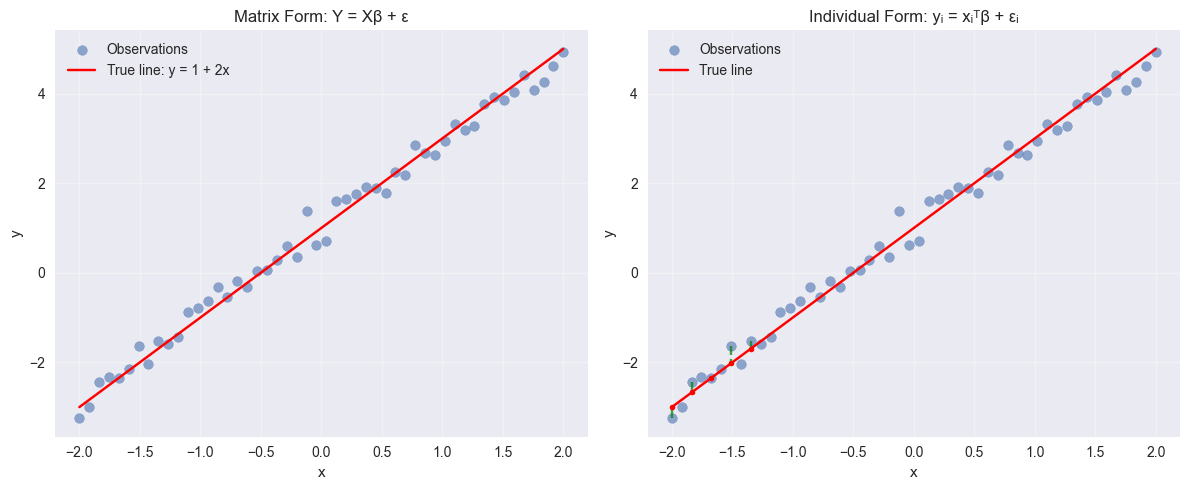


7. COMPUTATIONAL VERIFICATION
----------------------------------------
Key insight: Matrix multiplication is equivalent to
computing dot products of rows with the coefficient vector

Matrix multiplication X @ β:
Result shape: (100,)

Equivalent row-wise dot products:
Results are identical: True

For observation 0:
Matrix approach: (X @ β)[0] = 3.877368
Individual approach: X[0,:] @ β = 3.877368
Manual calculation: 1.000×2.000 + 0.497×1.500 + -1.415×-0.800 = 3.877368

CONCLUSION: The matrix representation Y = Xβ + ε is mathematically
equivalent to the collection of individual observations yᵢ = xᵢᵀβ + εᵢ
Matrix operations provide a compact, vectorized way to express the
same linear relationships that exist at the individual observation level.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n = 100  # number of observations
p = 3    # number of features (including intercept)

# Create feature matrix X with intercept column
X = np.column_stack([
    np.ones(n),           # intercept column
    np.random.randn(n),   # feature 1
    np.random.randn(n)    # feature 2
])

# True coefficients
beta_true = np.array([2.0, 1.5, -0.8])

# Generate response with noise
epsilon = np.random.randn(n) * 0.5
Y = X @ beta_true + epsilon

print("=" * 60)
print("LINEAR REGRESSION: MATRIX vs INDIVIDUAL OBSERVATION EQUIVALENCE")
print("=" * 60)

# ============================================================================
# PART 1: MATRIX REPRESENTATION
# ============================================================================
print("\n1. MATRIX REPRESENTATION: Y = Xβ + ε")
print("-" * 40)

print(f"X shape: {X.shape}")
print(f"β shape: {beta_true.shape}")
print(f"Y shape: {Y.shape}")
print(f"ε shape: {epsilon.shape}")

print("\nMatrix equation structure:")
print("Y = X @ β + ε")
print(f"({Y.shape[0]},) = ({X.shape[0]},{X.shape[1]}) @ ({beta_true.shape[0]},) + ({epsilon.shape[0]},)")

# Calculate Y using matrix operations
Y_matrix = X @ beta_true + epsilon

print(f"\nFirst 5 observations from matrix calculation:")
for i in range(5):
    print(f"Y[{i}] = {Y_matrix[i]:.4f}")

# ============================================================================
# PART 2: INDIVIDUAL OBSERVATION REPRESENTATION
# ============================================================================
print("\n\n2. INDIVIDUAL OBSERVATION REPRESENTATION")
print("-" * 40)

print("For each observation i: y_i = x_i^T β + ε_i")
print("Where x_i is the i-th row of X (as a column vector)")

# Calculate Y using individual observations
Y_individual = np.zeros(n)
for i in range(n):
    # x_i is the i-th row of X
    x_i = X[i, :]  # shape (p,)
    # Calculate y_i = x_i^T @ β + ε_i
    Y_individual[i] = x_i @ beta_true + epsilon[i]

print(f"\nFirst 5 observations from individual calculation:")
for i in range(5):
    x_i = X[i, :]
    y_i_components = x_i * beta_true  # element-wise multiplication to show components
    print(f"Y[{i}] = {x_i} @ {beta_true} + {epsilon[i]:.4f}")
    print(f"     = {y_i_components[0]:.4f} + {y_i_components[1]:.4f} + {y_i_components[2]:.4f} + {epsilon[i]:.4f}")
    print(f"     = {Y_individual[i]:.4f}")
    print()

# ============================================================================
# PART 3: VERIFICATION OF EQUIVALENCE
# ============================================================================
print("\n3. VERIFICATION OF EQUIVALENCE")
print("-" * 40)

# Check if the two approaches give identical results
are_equal = np.allclose(Y_matrix, Y_individual)
max_difference = np.max(np.abs(Y_matrix - Y_individual))

print(f"Are the results identical? {are_equal}")
print(f"Maximum absolute difference: {max_difference:.2e}")

# Show that the original Y equals both calculations
print(f"\nVerification with original Y:")
print(f"Y equals matrix calculation: {np.allclose(Y, Y_matrix)}")
print(f"Y equals individual calculation: {np.allclose(Y, Y_individual)}")

# ============================================================================
# PART 4: MATHEMATICAL BREAKDOWN
# ============================================================================
print("\n\n4. MATHEMATICAL BREAKDOWN")
print("-" * 40)

print("Matrix form: Y = Xβ + ε")
print("⎡y₁⎤   ⎡x₁₁ x₁₂ x₁₃⎤ ⎡β₁⎤   ⎡ε₁⎤")
print("⎢y₂⎥ = ⎢x₂₁ x₂₂ x₂₃⎥ ⎢β₂⎥ + ⎢ε₂⎥")
print("⎢y₃⎥   ⎢x₃₁ x₃₂ x₃₃⎥ ⎢β₃⎥   ⎢ε₃⎥")
print("⎣⋮ ⎦   ⎣⋮   ⋮   ⋮ ⎦ ⎣⋮ ⎦   ⎣⋮ ⎦")

print("\nExpanded individual observations:")
print("y₁ = x₁₁β₁ + x₁₂β₂ + x₁₃β₃ + ε₁")
print("y₂ = x₂₁β₁ + x₂₂β₂ + x₂₃β₃ + ε₂")
print("y₃ = x₃₁β₁ + x₃₂β₂ + x₃₃β₃ + ε₃")
print("⋮")

# Show actual values for first 3 observations
print(f"\nActual values for first 3 observations:")
for i in range(3):
    x_vals = X[i, :]
    terms = [f"{x_vals[j]:.3f}×{beta_true[j]:.3f}" for j in range(p)]
    equation = " + ".join(terms) + f" + {epsilon[i]:.3f}"
    result = Y[i]
    print(f"y_{i+1} = {equation} = {result:.4f}")

# ============================================================================
# PART 5: LEAST SQUARES SOLUTION COMPARISON
# ============================================================================
print("\n\n5. LEAST SQUARES SOLUTION COMPARISON")
print("-" * 40)

# Solve using matrix form: β̂ = (X^T X)^(-1) X^T Y
XtX = X.T @ X
XtY = X.T @ Y
beta_hat_matrix = np.linalg.inv(XtX) @ XtY

print("Matrix solution: β̂ = (X^T X)^(-1) X^T Y")
print(f"Estimated coefficients: {beta_hat_matrix}")

# Verify this is equivalent to minimizing sum of squared residuals
# from individual observations: Σ(y_i - x_i^T β)²
def sum_squared_residuals(beta, X, Y):
    residuals = Y - X @ beta
    return np.sum(residuals**2)

# The matrix solution should minimize the SSR
ssr_matrix_solution = sum_squared_residuals(beta_hat_matrix, X, Y)
print(f"Sum of squared residuals: {ssr_matrix_solution:.4f}")

# Show that this is the same as summing individual squared residuals
individual_ssr = 0
for i in range(n):
    residual_i = Y[i] - X[i, :] @ beta_hat_matrix
    individual_ssr += residual_i**2

print(f"Sum of individual squared residuals: {individual_ssr:.4f}")
print(f"Difference: {abs(ssr_matrix_solution - individual_ssr):.2e}")

# ============================================================================
# PART 6: VISUAL DEMONSTRATION (for 2D case)
# ============================================================================
print("\n\n6. VISUAL DEMONSTRATION")
print("-" * 40)

# Create a simple 2D example for visualization
n_vis = 50
X_vis = np.column_stack([np.ones(n_vis), np.linspace(-2, 2, n_vis)])
beta_vis = np.array([1.0, 2.0])  # intercept=1, slope=2
epsilon_vis = np.random.randn(n_vis) * 0.3
Y_vis = X_vis @ beta_vis + epsilon_vis

# Plot
plt.figure(figsize=(12, 5))

# Left plot: Matrix representation
plt.subplot(1, 2, 1)
plt.scatter(X_vis[:, 1], Y_vis, alpha=0.6, label='Observations')
x_line = np.linspace(-2, 2, 100)
y_line = beta_vis[0] + beta_vis[1] * x_line
plt.plot(x_line, y_line, 'r-', label='True line: y = 1 + 2x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Matrix Form: Y = Xβ + ε')
plt.legend()
plt.grid(True, alpha=0.3)

# Right plot: Individual observations
plt.subplot(1, 2, 2)
plt.scatter(X_vis[:, 1], Y_vis, alpha=0.6, label='Observations')
# Highlight first few individual predictions
for i in range(0, min(10, n_vis), 2):
    x_i = X_vis[i, 1]
    y_i_pred = beta_vis[0] + beta_vis[1] * x_i
    plt.plot([x_i, x_i], [Y_vis[i], y_i_pred], 'g--', alpha=0.7)
    plt.plot(x_i, y_i_pred, 'ro', markersize=4)

plt.plot(x_line, y_line, 'r-', label='True line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Individual Form: yᵢ = xᵢᵀβ + εᵢ')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('linear_regression_equivalence.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
# PART 7: COMPUTATIONAL VERIFICATION
# ============================================================================
print("\n7. COMPUTATIONAL VERIFICATION")
print("-" * 40)

print("Key insight: Matrix multiplication is equivalent to")
print("computing dot products of rows with the coefficient vector")

# Demonstrate this explicitly
print("\nMatrix multiplication X @ β:")
result_matrix = X @ beta_true
print(f"Result shape: {result_matrix.shape}")

print("\nEquivalent row-wise dot products:")
result_individual = np.zeros(n)
for i in range(n):
    result_individual[i] = np.dot(X[i, :], beta_true)

print(f"Results are identical: {np.allclose(result_matrix, result_individual)}")

# Show the mathematical equivalence more explicitly
print(f"\nFor observation 0:")
print(f"Matrix approach: (X @ β)[0] = {result_matrix[0]:.6f}")
print(f"Individual approach: X[0,:] @ β = {result_individual[0]:.6f}")
print(f"Manual calculation: {X[0,0]:.3f}×{beta_true[0]:.3f} + {X[0,1]:.3f}×{beta_true[1]:.3f} + {X[0,2]:.3f}×{beta_true[2]:.3f} = {X[0,0]*beta_true[0] + X[0,1]*beta_true[1] + X[0,2]*beta_true[2]:.6f}")

print("\n" + "=" * 60)
print("CONCLUSION: The matrix representation Y = Xβ + ε is mathematically")
print("equivalent to the collection of individual observations yᵢ = xᵢᵀβ + εᵢ")
print("Matrix operations provide a compact, vectorized way to express the")
print("same linear relationships that exist at the individual observation level.")
print("=" * 60)

<h3>(2) Come up with a story about a theoretical relationship between a dependent variable and two independent variables.</h3>
<p>The second independent variable should be the first independent variable squared. Your story should include an explanation for the inclusion of both terms. For example, if the dependent variable is tax revenue, and the independent variable is tax rate, then we might expect this type of nonlinear relationship as tax revenue likely increases with tax rate for low tax rates, but probably decreases with tax rate for very high tax rates. 
Simulate data for your example then plot the data and population regression line. Show the equation of the derivative (slope) of the dependent variable with respect to the independent variable. 
Plot this derivative equation as a line in a second plot and explain the meaning. Comment on both plots.
</p>

Housing datasets are widely used in data science since their interpretable variables are intuitive and make sense on way they'd change the slope of the dependent variable. The price of a house (dependent) is directly affected by independent variables like sqft, acreage, year, and kitchen quality. Conceptionally it is easy to understand that an increase in sqft, acreage, and quality will make the depdendent variable(price) have a steeper slope showing feature importance. 
However, looking at the feature "acreage", this will impact price (dependent) by a huge margin in suburban areas when increasing lot size by .5 or 1 acre. This increase in price is significantly reduced when looking at farmland or unwanted rural land at 10 or 11 acres. This 1 acre increase in a rural area doesn't impact the price (dependent variable) nearly as much as it would impact the same dependent variable in a highly coveted neighborhood.

HOUSING PRICE vs ACRES: DIMINISHING RETURNS ANALYSIS

1. DATA SIMULATION
----------------------------------------
Sample size: 200 houses
Acres range: 0.13 to 4.94
True population model:
Price = 150,000 + 80,000×(acres) + -8,000×(acres²) + ε
Noise standard deviation: $25,000

2. REGRESSION MODEL FITTING
----------------------------------------
Estimated coefficients:
β̂₀ (intercept) = $156,815
β̂₁ (acres)     = $74,758
β̂₂ (acres²)    = $-7,044

True vs Estimated:
β₀: True = $150,000, Estimated = $156,815
β₁: True = $80,000, Estimated = $74,758
β₂: True = $-8,000, Estimated = $-7,044

Estimated model equation:
Price = 156,815 + 74,758×(acres) + -7,044×(acres²)

3. DERIVATIVE ANALYSIS
----------------------------------------
For the quadratic model: Price = β₀ + β₁×acres + β₂×acres²
The derivative (marginal effect) is:
dPrice/dAcres = β₁ + 2×β₂×acres

Using estimated coefficients:
dPrice/dAcres = 74,758 + 2×(-7,044)×acres
dPrice/dAcres = 74,758 + -14,088×acres

Diminishing returns analy

C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_12208\1322539811.py:160: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_12208\1322539811.py:160: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_12208\1322539811.py:161: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.savefig('housing_analysis.png', dpi=150, bbox_inches='tight')
C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_12208\1322539811.py:161: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig('housing_analysis.png', dpi=150, bbox_inches='tight')
c:\Users\n0308g\python_venv\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\n0308g\python_venv\venv\Lib\site-package

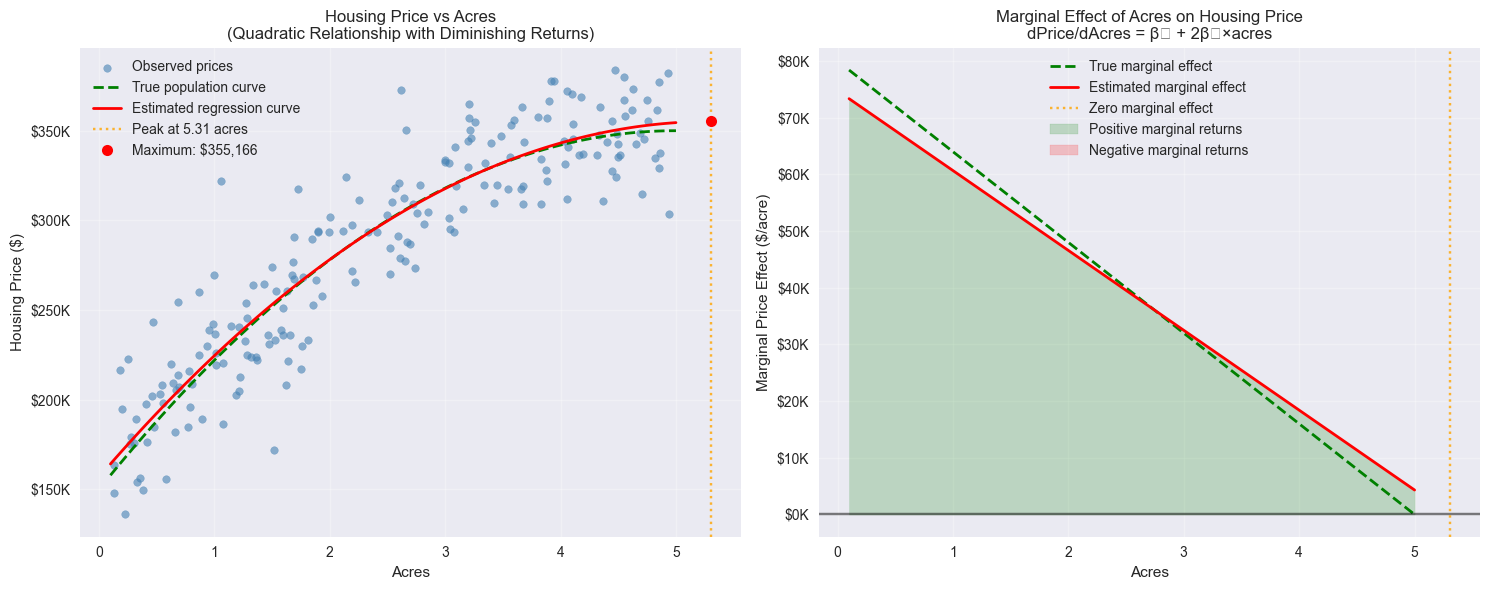


5. INTERPRETATION OF RESULTS
----------------------------------------
DIMINISHING RETURNS EXPLANATION:
───────────────────────────────────
• At 0.5 acres: Marginal effect = $67,771/acre
• At 1.0 acres: Marginal effect = $60,798/acre
• At 2.0 acres: Marginal effect = $46,852/acre
• At 3.0 acres: Marginal effect = $32,209/acre

ECONOMIC INTERPRETATION:
─────────────────────────
• The quadratic term (β₂ < 0) captures diminishing marginal utility of land
• Initially, additional acres significantly increase property value
• As lot size increases, each additional acre adds less value
• Beyond 5.31 acres, additional land actually decreases value
• This could reflect maintenance costs, taxes, or market preferences

MARGINAL ANALYSIS:
────────────────────
The derivative dPrice/dAcres tells us:
• How much the price changes for a small increase in acres
• When marginal benefit > 0: More acres increase value
• When marginal benefit = 0: Optimal lot size reached
• When marginal benefit < 0: Additi

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

# Set style and random seed
plt.style.use('seaborn-v0_8')
np.random.seed(42)

print("=" * 70)
print("HOUSING PRICE vs ACRES: DIMINISHING RETURNS ANALYSIS")
print("=" * 70)

# ============================================================================
# PART 1: SIMULATE HOUSING DATA WITH DIMINISHING RETURNS
# ============================================================================
print("\n1. DATA SIMULATION")
print("-" * 40)

# Generate acres data (independent variable)
n_houses = 200
acres = np.random.uniform(0.1, 5.0, n_houses)  # 0.1 to 5 acres

# True population parameters for the quadratic model
# Price = β₀ + β₁(acres) + β₂(acres²) + ε
beta_0 = 150000   # Base price (intercept)
beta_1 = 80000    # Linear coefficient (positive)
beta_2 = -8000    # Quadratic coefficient (negative for diminishing returns)

# Calculate true housing prices with quadratic relationship
price_true = beta_0 + beta_1 * acres + beta_2 * (acres**2)

# Add random noise
noise_std = 25000
epsilon = np.random.normal(0, noise_std, n_houses)
price_observed = price_true + epsilon

print(f"Sample size: {n_houses} houses")
print(f"Acres range: {acres.min():.2f} to {acres.max():.2f}")
print(f"True population model:")
print(f"Price = {beta_0:,} + {beta_1:,}×(acres) + {beta_2:,}×(acres²) + ε")
print(f"Noise standard deviation: ${noise_std:,}")

# ============================================================================
# PART 2: FIT REGRESSION MODEL
# ============================================================================
print(f"\n2. REGRESSION MODEL FITTING")
print("-" * 40)

# Prepare data for sklearn
X = acres.reshape(-1, 1)
y = price_observed

# Create polynomial features (acres and acres²)
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)

# Fit the model
model = LinearRegression(fit_intercept=False)  # We already have intercept in polynomial features
model.fit(X_poly, y)

# Extract estimated coefficients
beta_hat = model.coef_
print(f"Estimated coefficients:")
print(f"β̂₀ (intercept) = ${beta_hat[0]:,.0f}")
print(f"β̂₁ (acres)     = ${beta_hat[1]:,.0f}")
print(f"β̂₂ (acres²)    = ${beta_hat[2]:,.0f}")

print(f"\nTrue vs Estimated:")
print(f"β₀: True = ${beta_0:,}, Estimated = ${beta_hat[0]:,.0f}")
print(f"β₁: True = ${beta_1:,}, Estimated = ${beta_hat[1]:,.0f}")
print(f"β₂: True = ${beta_2:,}, Estimated = ${beta_hat[2]:,.0f}")

# Model equation
print(f"\nEstimated model equation:")
print(f"Price = {beta_hat[0]:,.0f} + {beta_hat[1]:,.0f}×(acres) + {beta_hat[2]:,.0f}×(acres²)")

# ============================================================================
# PART 3: DERIVATIVE ANALYSIS
# ============================================================================
print(f"\n3. DERIVATIVE ANALYSIS")
print("-" * 40)

print("For the quadratic model: Price = β₀ + β₁×acres + β₂×acres²")
print("The derivative (marginal effect) is:")
print("dPrice/dAcres = β₁ + 2×β₂×acres")
print()
print(f"Using estimated coefficients:")
print(f"dPrice/dAcres = {beta_hat[1]:,.0f} + 2×({beta_hat[2]:,.0f})×acres")
print(f"dPrice/dAcres = {beta_hat[1]:,.0f} + {2*beta_hat[2]:,.0f}×acres")

# Calculate derivative values
acres_range = np.linspace(0.1, 5.0, 100)
derivative_true = beta_1 + 2 * beta_2 * acres_range
derivative_estimated = beta_hat[1] + 2 * beta_hat[2] * acres_range

# Find the peak (where derivative = 0)
peak_acres_true = -beta_1 / (2 * beta_2)
peak_acres_estimated = -beta_hat[1] / (2 * beta_hat[2])

print(f"\nDiminishing returns analysis:")
print(f"Marginal benefit becomes zero at: {peak_acres_estimated:.2f} acres")
print(f"(True optimum: {peak_acres_true:.2f} acres)")

max_price_estimated = beta_hat[0] + beta_hat[1]*peak_acres_estimated + beta_hat[2]*(peak_acres_estimated**2)
print(f"Maximum estimated price: ${max_price_estimated:,.0f}")

# ============================================================================
# PART 4: PLOTTING
# ============================================================================
print(f"\n4. VISUALIZATION")
print("-" * 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Housing price vs acres with regression curve
ax1.scatter(acres, price_observed, alpha=0.6, s=30, color='steelblue', label='Observed prices')

# Plot true and estimated regression curves
price_true_line = beta_0 + beta_1 * acres_range + beta_2 * (acres_range**2)
price_estimated_line = beta_hat[0] + beta_hat[1] * acres_range + beta_hat[2] * (acres_range**2)

ax1.plot(acres_range, price_true_line, 'g--', linewidth=2, label='True population curve')
ax1.plot(acres_range, price_estimated_line, 'r-', linewidth=2, label='Estimated regression curve')

# Mark the peak
ax1.axvline(peak_acres_estimated, color='orange', linestyle=':', alpha=0.8, label=f'Peak at {peak_acres_estimated:.2f} acres')
ax1.plot(peak_acres_estimated, max_price_estimated, 'ro', markersize=8, label=f'Maximum: ${max_price_estimated:,.0f}')

ax1.set_xlabel('Acres')
ax1.set_ylabel('Housing Price ($)')
ax1.set_title('Housing Price vs Acres\n(Quadratic Relationship with Diminishing Returns)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Plot 2: Derivative (marginal effect)
ax2.plot(acres_range, derivative_true, 'g--', linewidth=2, label='True marginal effect')
ax2.plot(acres_range, derivative_estimated, 'r-', linewidth=2, label='Estimated marginal effect')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.axvline(peak_acres_estimated, color='orange', linestyle=':', alpha=0.8, label=f'Zero marginal effect')

# Fill areas to show positive/negative returns
acres_pos = acres_range[acres_range < peak_acres_estimated]
derivative_pos = derivative_estimated[acres_range < peak_acres_estimated]
acres_neg = acres_range[acres_range > peak_acres_estimated]
derivative_neg = derivative_estimated[acres_range > peak_acres_estimated]

ax2.fill_between(acres_pos, 0, derivative_pos, alpha=0.2, color='green', label='Positive marginal returns')
ax2.fill_between(acres_neg, 0, derivative_neg, alpha=0.2, color='red', label='Negative marginal returns')

ax2.set_xlabel('Acres')
ax2.set_ylabel('Marginal Price Effect ($/acre)')
ax2.set_title('Marginal Effect of Acres on Housing Price\ndPrice/dAcres = β₁ + 2β₂×acres')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('housing_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
# PART 5: DETAILED INTERPRETATION
# ============================================================================
print(f"\n5. INTERPRETATION OF RESULTS")
print("-" * 40)

print("DIMINISHING RETURNS EXPLANATION:")
print("─" * 35)
print(f"• At 0.5 acres: Marginal effect = ${derivative_estimated[np.argmin(np.abs(acres_range - 0.5))]:,.0f}/acre")
print(f"• At 1.0 acres: Marginal effect = ${derivative_estimated[np.argmin(np.abs(acres_range - 1.0))]:,.0f}/acre")
print(f"• At 2.0 acres: Marginal effect = ${derivative_estimated[np.argmin(np.abs(acres_range - 2.0))]:,.0f}/acre")
print(f"• At 3.0 acres: Marginal effect = ${derivative_estimated[np.argmin(np.abs(acres_range - 3.0))]:,.0f}/acre")

print(f"\nECONOMIC INTERPRETATION:")
print("─" * 25)
print("• The quadratic term (β₂ < 0) captures diminishing marginal utility of land")
print("• Initially, additional acres significantly increase property value")
print("• As lot size increases, each additional acre adds less value")
print(f"• Beyond {peak_acres_estimated:.2f} acres, additional land actually decreases value")
print("• This could reflect maintenance costs, taxes, or market preferences")

print(f"\nMARGINAL ANALYSIS:")
print("─" * 20)
print("The derivative dPrice/dAcres tells us:")
print("• How much the price changes for a small increase in acres")
print("• When marginal benefit > 0: More acres increase value")
print("• When marginal benefit = 0: Optimal lot size reached")
print("• When marginal benefit < 0: Additional acres decrease value")

# ============================================================================
# PART 6: STATISTICAL SUMMARY
# ============================================================================
print(f"\n6. MODEL STATISTICS")
print("-" * 40)

# Calculate R²
y_pred = model.predict(X_poly)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"Model R²: {r_squared:.4f}")
print(f"Root Mean Square Error: ${np.sqrt(np.mean((y - y_pred)**2)):,.0f}")

# Show some predictions vs actual
print(f"\nSample predictions:")
for i in range(5):
    actual = price_observed[i]
    predicted = y_pred[i]
    error = actual - predicted
    print(f"House {i+1}: {acres[i]:.2f} acres → Actual: ${actual:,.0f}, Predicted: ${predicted:,.0f}, Error: ${error:,.0f}")

print(f"\nThe quadratic model successfully captures the diminishing returns")
print(f"relationship between lot size and housing price!")

<h3>(3) Come up with a story and simulate data for a population regression model with two independent variables: a continuous variable and a categorical variable. </h3>
<p> Plot the data on a scatter plot. Use the LinearRegression class from the linear_model module in the sklearn library to estimate two regression equations: one that includes only the continuous variable as an independent variable, and one that includes both the continuous and categorical variable (see the Introduction to Econometrics colabLinks to an external site.). 
Plot these lines on the same chart. (Note that the model with the categorical will actually be represented by two lines like in the Colab example, so there will be three total lines on the chart.) Comment on how well the lines do in terms of estimating the relationship (slope) between the dependent variable and continuous independent variable.</p>